In [1]:
# Carga do dataset Fifa
import pandas as pd
dfFifa = pd.read_csv("c:\TCC\data.csv")
print(dfFifa.head())

   Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   

In [2]:
# Filtro do campos pertinentes a analise 
dfFifa = dfFifa[['Name', 'Club', 'Age', 'Nationality', 'Height', 'Weight', 'Position', 
                 'Overall']]
print(dfFifa.head())

                Name                 Club  Age Nationality Height  Weight  \
0           L. Messi         FC Barcelona   31   Argentina    5'7  159lbs   
1  Cristiano Ronaldo             Juventus   33    Portugal    6'2  183lbs   
2          Neymar Jr  Paris Saint-Germain   26      Brazil    5'9  150lbs   
3             De Gea    Manchester United   27       Spain    6'4  168lbs   
4       K. De Bruyne      Manchester City   27     Belgium   5'11  154lbs   

  Position  Overall  
0       RF       94  
1       ST       94  
2       LW       92  
3       GK       91  
4      RCM       91  


In [3]:
# Conversão do campo altura em centímetros para viabilizar a analise dos cálculos
dfFifa.dropna (inplace = True)
Height_cm = []
for i in list(dfFifa['Height'].values):
    try:
        Height_cm.append((float(str(i)[0])*12.0 + float(str(i)[2:]))*2.54)
    except(ValueError):
        Height_cm.append(np.nan)
        
dfFifa['Height_cm'] = Height_cm

print(dfFifa.head())

                Name                 Club  Age Nationality Height  Weight  \
0           L. Messi         FC Barcelona   31   Argentina    5'7  159lbs   
1  Cristiano Ronaldo             Juventus   33    Portugal    6'2  183lbs   
2          Neymar Jr  Paris Saint-Germain   26      Brazil    5'9  150lbs   
3             De Gea    Manchester United   27       Spain    6'4  168lbs   
4       K. De Bruyne      Manchester City   27     Belgium   5'11  154lbs   

  Position  Overall  Height_cm  
0       RF       94     170.18  
1       ST       94     187.96  
2       LW       92     175.26  
3       GK       91     193.04  
4      RCM       91     180.34  


In [8]:
# Carga do dataset Premier League
dfPremierLeague = pd.read_csv("c:\TCC\epl_1819.csv")
print(dfPremierLeague.head())

              Club                        category  general_league_position  \
0  Manchester City                Champions League                        1   
1        Liverpool                Champions League                        2   
2          Chelsea  Champions League Qualification                        3   
3        Tottenham  Champions League Qualification                        4   
4          Arsenal                   Europa League                        5   

   finance_live_games_televised  finance_tv_revenue  general_matches_played  \
0                            26           150986355                      38   
1                            29           152425146                      38   
2                            25           146030216                      38   
3                            26           145230801                      38   
4                            25           142193180                      38   

   general_won  general_draw  general_lost  attack

In [9]:
# Filtro do campos pertinentes a analise
dfPremierLeague = dfPremierLeague[['Club', 'general_league_position', 'general_won', 'attack_scored', 'attack_goals_headed',
                                   'finance_market_average', 'general_goal_difference']]
print(dfPremierLeague.head())

              Club  general_league_position  general_won  attack_scored  \
0  Manchester City                        1           32             95   
1        Liverpool                        2           30             89   
2          Chelsea                        3           21             63   
3        Tottenham                        4           23             67   
4          Arsenal                        5           21             73   

   attack_goals_headed  finance_market_average  general_goal_difference  
0                   12                39987200                       72  
1                   19                34848000                       67  
2                    8                29981600                       24  
3                   14                29409600                       28  
4                    5                26989600                       22  


In [10]:
# Merge dos dataset Fifa e Premiar Legue, filtrado apenas os clubes parcipantes da edição do Premiar Legue analisada
dfFifaPremierLeague = pd.merge(dfFifa, dfPremierLeague, on=["Club"],how='inner')
print(dfFifaPremierLeague)

           Name               Club  Age Nationality Height  Weight Position  \
0        De Gea  Manchester United   27       Spain    6'4  168lbs       GK   
1      P. Pogba  Manchester United   25      France    6'4  185lbs      RDM   
2     R. Lukaku  Manchester United   25     Belgium    6'3  207lbs       ST   
3    A. Sánchez  Manchester United   29       Chile    5'7  163lbs       RW   
4    A. Martial  Manchester United   22      France    6'0  168lbs       LW   
..          ...                ...  ...         ...    ...     ...      ...   
545    J. McKay       Cardiff City   21    Scotland    6'3  187lbs       ST   
546    J. Veale       Cardiff City   21       Wales    5'8  154lbs       CM   
547     C. Coxe       Cardiff City   19       Wales   5'11  154lbs       RB   
548    J. Waite       Cardiff City   19       Wales    5'9  134lbs       CM   
549    C. Brown       Cardiff City   20     England    6'1  168lbs       CB   

     Overall  Height_cm  general_league_position  g

In [11]:
# Analise comparativa da relação da média de altura dos jogadores com a média de gols realizados de cabeça
dfFifaPremierLeague.groupby(['general_league_position','Club'])['Height_cm', 'attack_goals_headed'].mean().head(20)

,,Height_cm,attack_goals_headed
general_league_position,Club,,
1,Manchester City,180.647879,12
2,Liverpool,180.647879,19
3,Chelsea,182.341212,8
5,Arsenal,183.110909,5
6,Manchester United,183.264848,4
8,Everton,182.324375,13
9,Leicester City,181.768750,9
10,West Ham United,182.165625,10
11,Watford,184.281379,8


<BarContainer object of 17 artists>

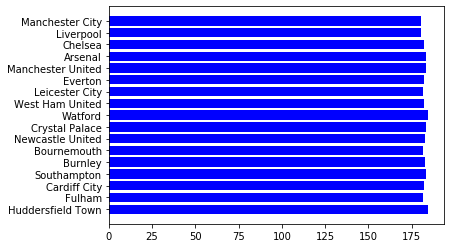

In [15]:
# Analise comparativa da relação da posição do clube no campeonato com a média de altura dos jogadores
import matplotlib.pyplot as plt
plt.barh(dfFifaPremierLeague.sort_values(['general_league_position'],ascending=False)['Club'].unique(), 
        dfFifaPremierLeague.sort_values(['general_league_position'],ascending=False).groupby(['Club'],sort=False)
         ['Height_cm'].mean(), color='blue')

In [13]:
# Analise comparativa da relação da média de idade dos jogadores com a média de vitorias do clube no campeonado 
dfFifaPremierLeague.groupby(['general_league_position','Club'])['Age', 'general_won'].mean().head(20)

,,Age,general_won
general_league_position,Club,,
1,Manchester City,23.909091,32.0
2,Liverpool,24.000000,30.0
3,Chelsea,25.212121,21.0
5,Arsenal,24.606061,21.0
6,Manchester United,24.757576,19.0
8,Everton,24.375000,15.0
9,Leicester City,25.562500,15.0
10,West Ham United,25.437500,15.0
11,Watford,25.482759,14.0


<BarContainer object of 17 artists>

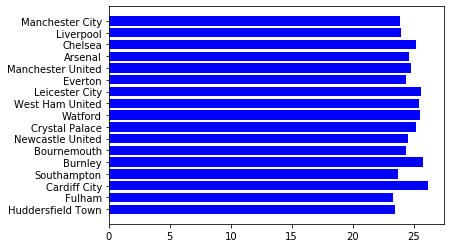

In [14]:
# Analise comparativa da relação da posição do clube no campeonato com a média de idade dos jogadores
plt.barh(dfFifaPremierLeague.sort_values(['general_league_position'],ascending=False)['Club'].unique(), 
        dfFifaPremierLeague.sort_values(['general_league_position'],ascending=False).groupby(['Club'],sort=False)
         ['Age'].mean(), color='blue')

In [57]:
# Analise comparativa da relação da média da avaliação geral dos jogadores com a média de gols do clube no campeonado 
dfFifaPremierLeague.groupby(['general_league_position','Club'])['Overall','attack_scored'].mean().head(20)

,,Overall,attack_scored
general_league_position,Club,,
1,Manchester City,76.727273,95.0
2,Liverpool,76.000000,89.0
3,Chelsea,76.787879,63.0
5,Arsenal,75.181818,73.0
6,Manchester United,77.242424,65.0
8,Everton,74.500000,54.0
9,Leicester City,73.843750,51.0
10,West Ham United,73.093750,52.0
11,Watford,72.344828,52.0


<BarContainer object of 17 artists>

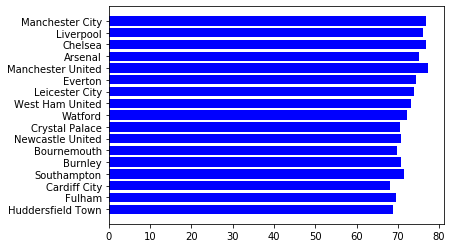

In [58]:
# Analise comparativa da relação da posição do clube no campeonato com a média da avaliação geral dos jogadores
plt.barh(dfFifaPremierLeague.sort_values(['general_league_position'],ascending=False)['Club'].unique(), 
        dfFifaPremierLeague.sort_values(['general_league_position'],ascending=False).groupby(['Club'],sort=False)
         ['Overall'].mean(), color='blue')

In [59]:
# Analise comparativa da relação da média valor de mercado dos jogadores com o saldo de gols do clube no campeonado 
dfFifaPremierLeague.groupby(['general_league_position','Club'])['finance_market_average', 
                                                                'general_goal_difference'].mean().head(20)

,,finance_market_average,general_goal_difference
general_league_position,Club,,
1,Manchester City,39987200,72
2,Liverpool,34848000,67
3,Chelsea,29981600,24
5,Arsenal,26989600,22
6,Manchester United,22017600,11
8,Everton,11748000,8
9,Leicester City,10929600,3
10,West Ham United,9011200,-3
11,Watford,9169600,-7


<BarContainer object of 17 artists>

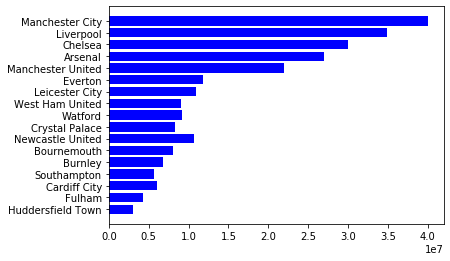

In [60]:
# Analise comparativa da relação da posição do clube no campeonato com a média valor de mercado dos jogadores
plt.barh(dfFifaPremierLeague.sort_values(['general_league_position'],ascending=False)['Club'].unique(), 
        dfFifaPremierLeague.sort_values(['general_league_position'],ascending=False).groupby(['Club'],sort=False)
         ['finance_market_average'].mean(), color='blue')